1. Loading the Data <br>
First, we load the dataset, check its structure, and understand the general attributes of the data.

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes)
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Combine features and target into a single DataFrame
df = pd.concat([X, y], axis=1)

In [43]:
# 1. Basic Information
# Check the first few rows of the dataset
print(df.head())

# Check the basic information about the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Basic statistical summary of the dataset
print(df.describe())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       

In [7]:
# 2. Data Cleaning
# Check for duplicates
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")

# Handling missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

Number of duplicate rows: 0


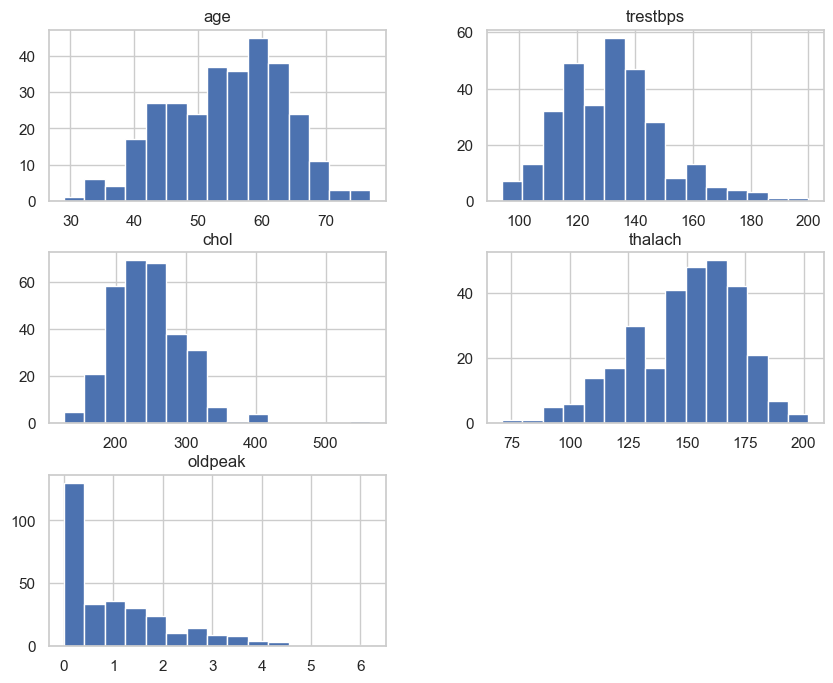

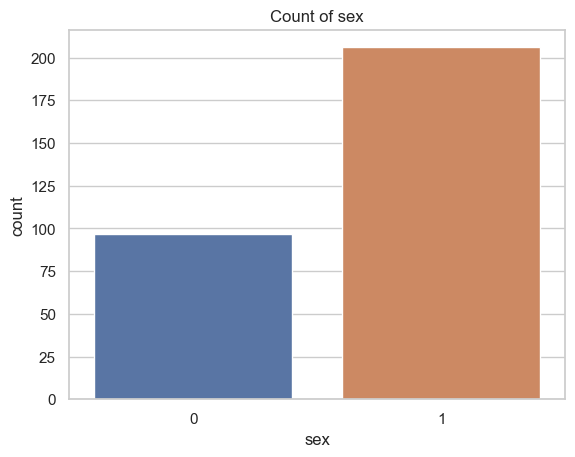

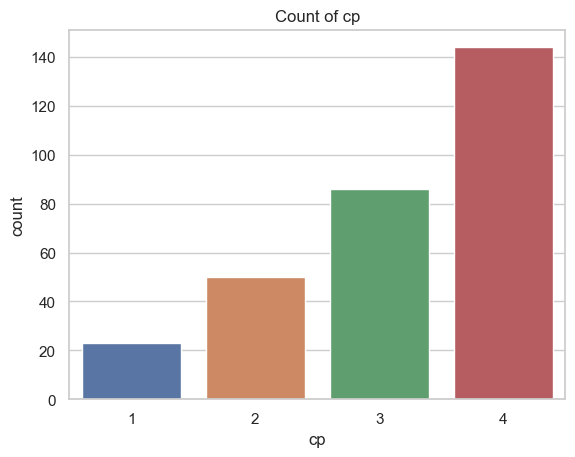

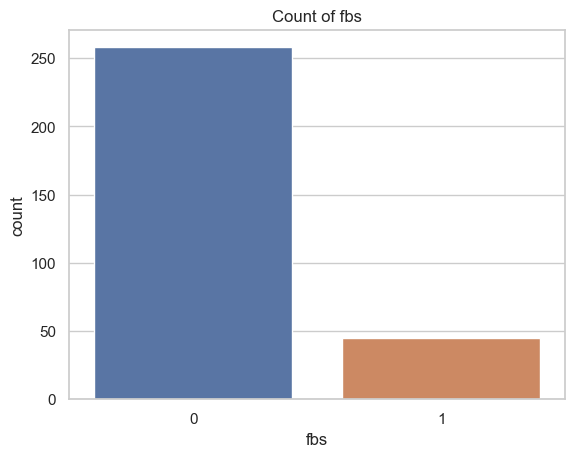

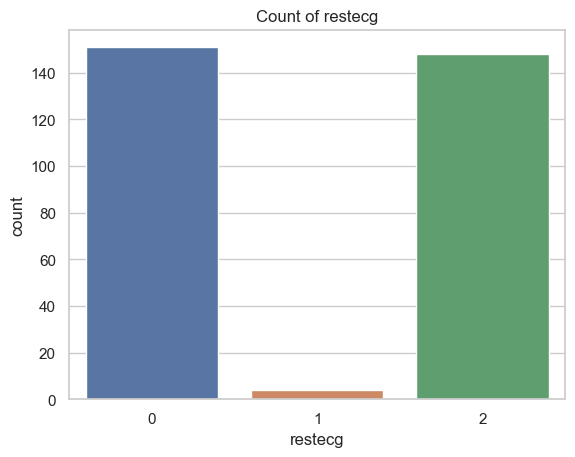

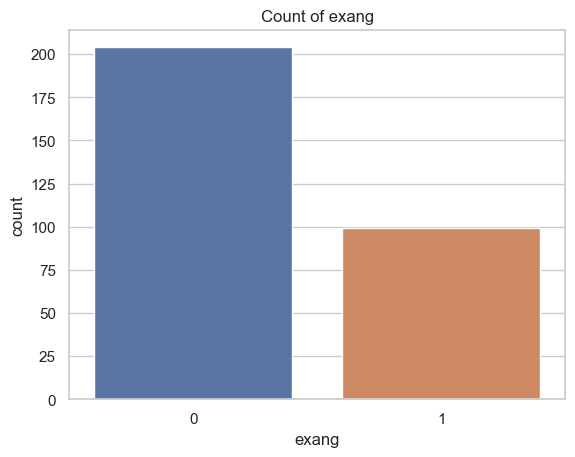

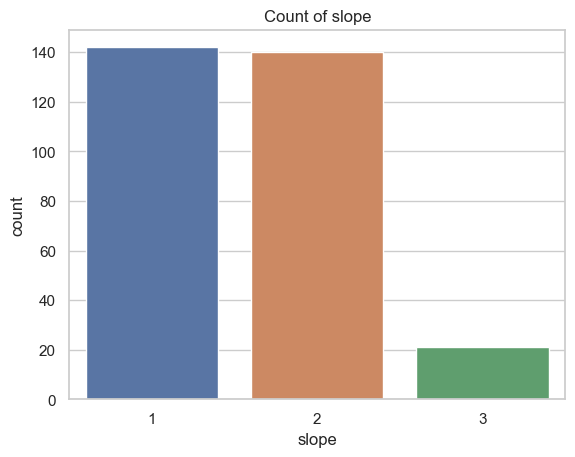

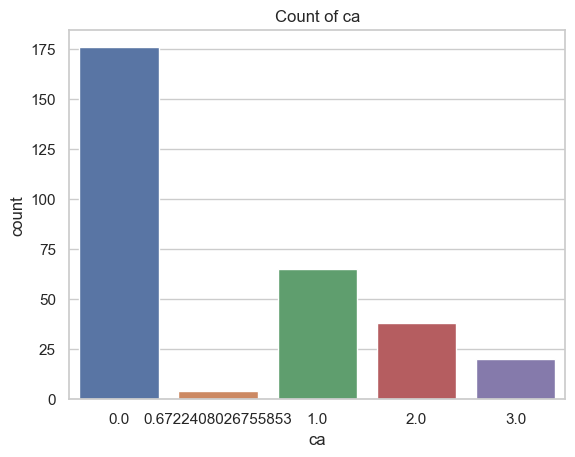

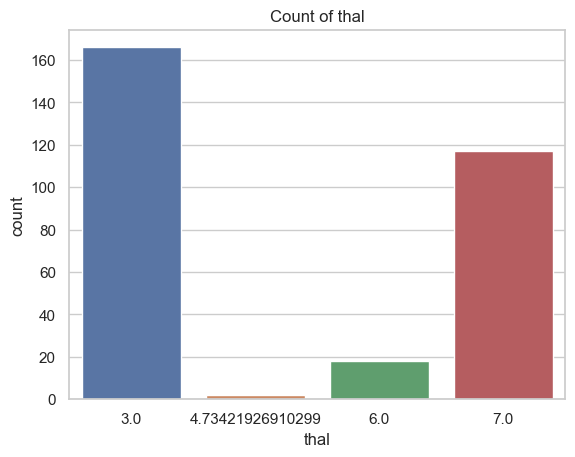

In [45]:
# 3. Univariate Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Histograms for numerical features
df[numerical_features].hist(figsize=(10, 8), bins=15)
plt.show()

# Bar plot for categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Plot bar charts for categorical features
for feature in categorical_features:
    sns.countplot(x=feature, data=df)
    plt.title(f"Count of {feature}")
    plt.show()


c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


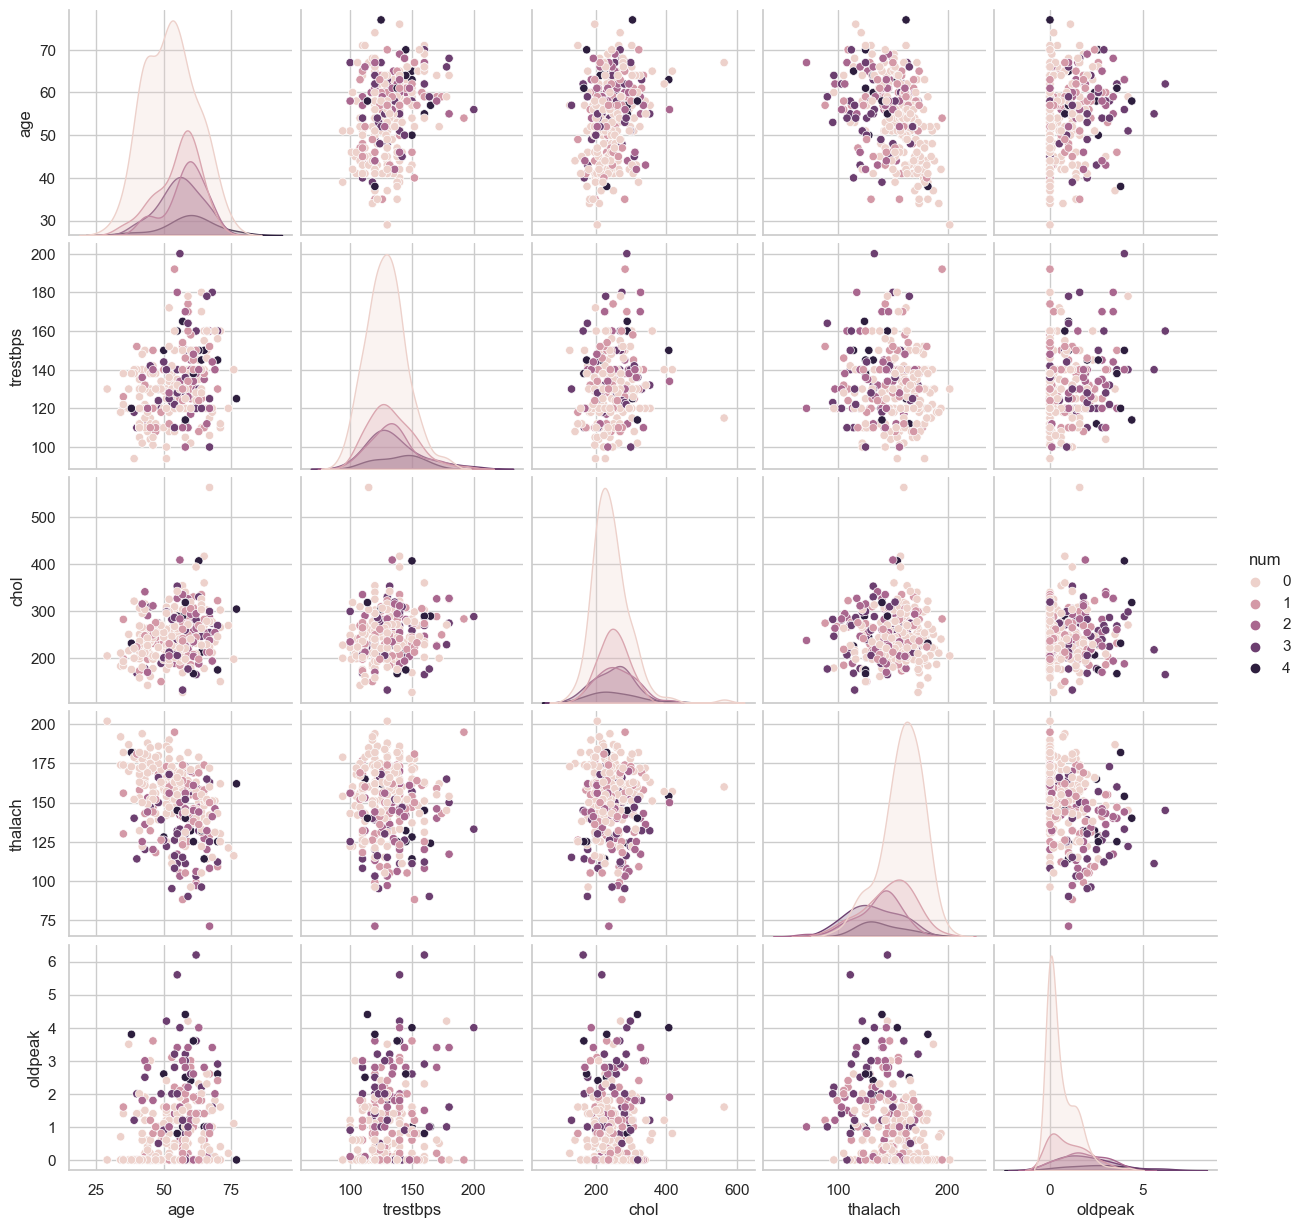

In [46]:
# 4. Bivariate Analysis

# Pair plots for numerical features and target
sns.pairplot(df[numerical_features + ['num']], hue='num')
plt.show()

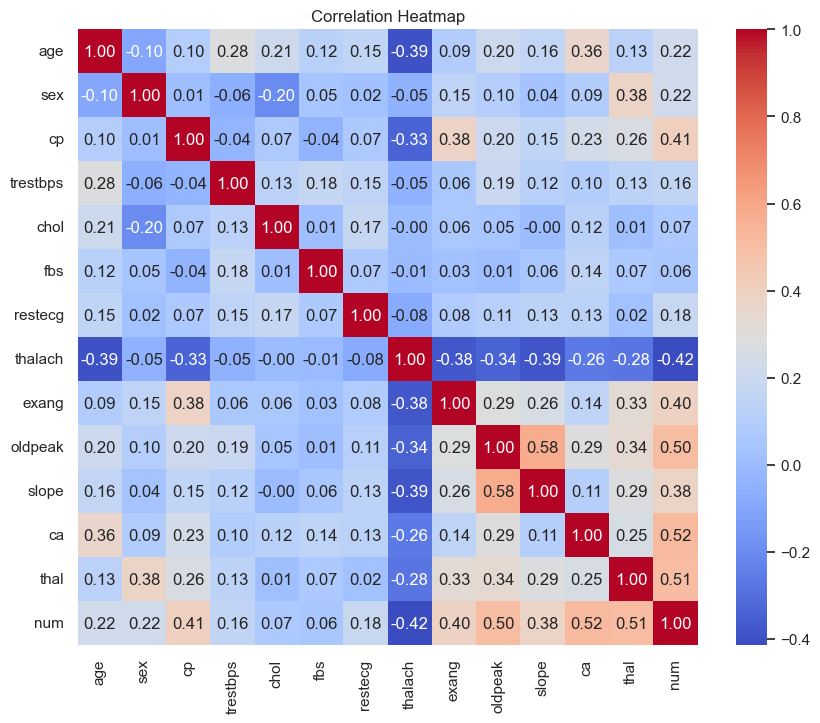

In [47]:
# 5. Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [48]:
correlation_matrix = df.corr()

# Print correlation matrix in a tabular format
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.097542  0.104139  0.284946  0.208950  0.118530   
sex      -0.097542  1.000000  0.010084 -0.064456 -0.199915  0.047862   
cp        0.104139  0.010084  1.000000 -0.036077  0.072319 -0.039975   
trestbps  0.284946 -0.064456 -0.036077  1.000000  0.130120  0.175340   
chol      0.208950 -0.199915  0.072319  0.130120  1.000000  0.009841   
fbs       0.118530  0.047862 -0.039975  0.175340  0.009841  1.000000   
restecg   0.148868  0.021647  0.067505  0.146560  0.171043  0.069564   
thalach  -0.393806 -0.048663 -0.334422 -0.045351 -0.003432 -0.007854   
exang     0.091661  0.146201  0.384060  0.064762  0.061310  0.025665   
oldpeak   0.203805  0.102173  0.202277  0.189171  0.046564  0.005747   
slope     0.161770  0.037533  0.152050  0.117382 -0.004062  0.059894   
ca        0.359489  0.092891  0.232332  0.098707  0.118525  0.143967   
thal      0.127368  0.379300  0.264895  0.13

Binary Classification

In [8]:
# Convert the target variable to binary to classify the presence or absence of heart disease.

# Convert the target variable to binary
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

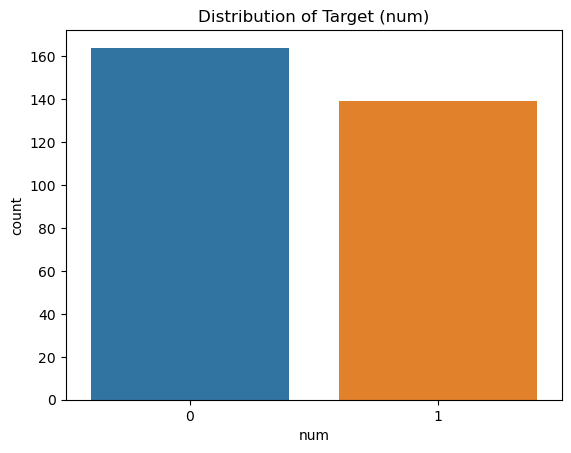

In [11]:
# Plot target distribution
sns.countplot(x='num', data=df)
plt.title('Distribution of Target (num)')
plt.show()

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


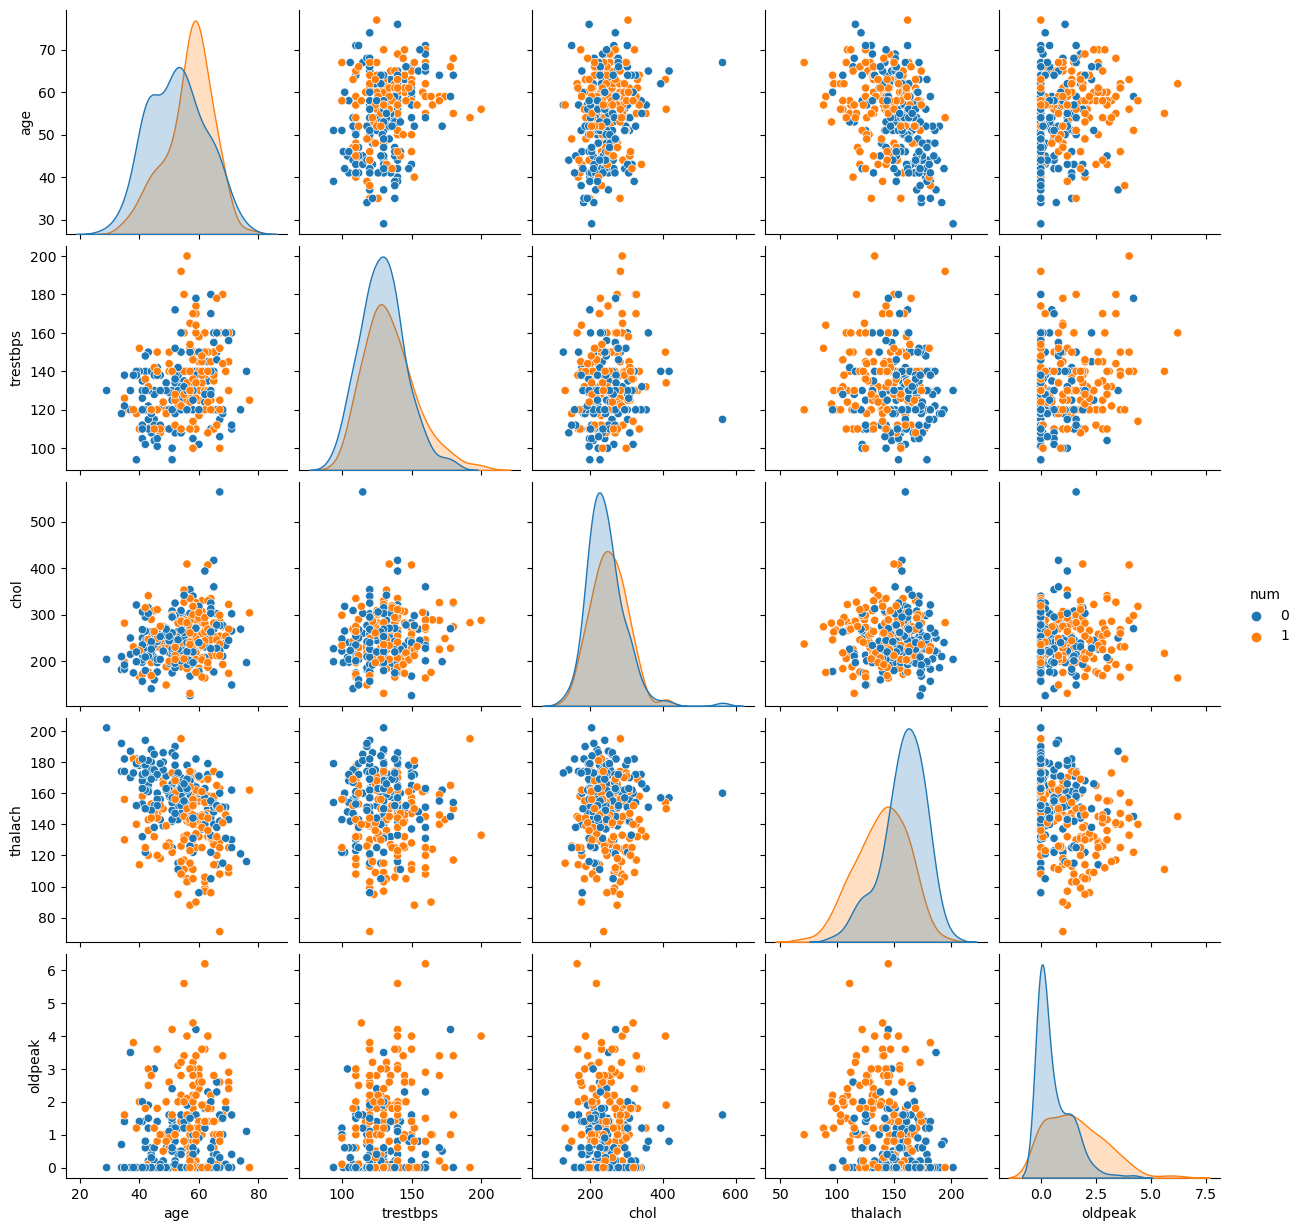

In [12]:
# Pair plots for numerical features and target
sns.pairplot(df[numerical_features + ['num']], hue='num')
plt.show()

Outlier

In [13]:
from scipy import stats

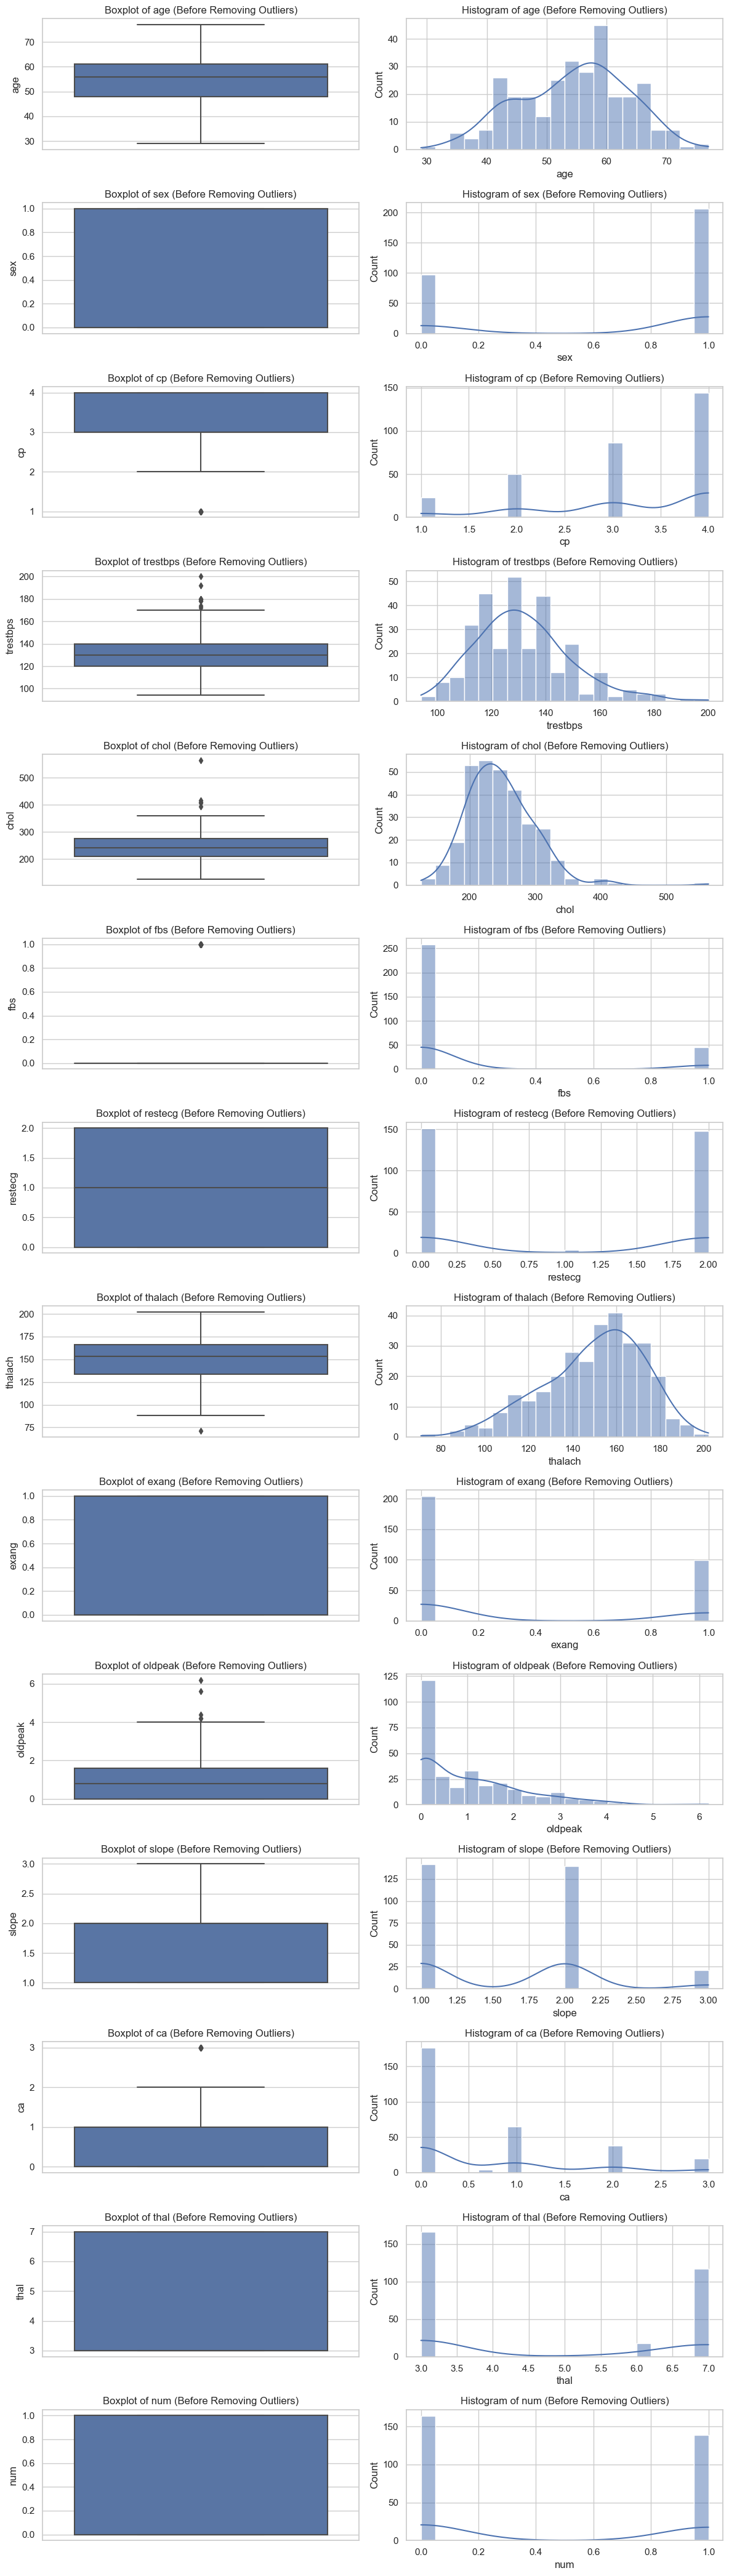

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distributions(df, title_suffix):
    # Set the style of the visualizations
    sns.set(style="whitegrid")

    # Create subplots for each feature
    features = df.select_dtypes(include=['float64', 'int']).columns
    num_features = len(features)

    fig, axes = plt.subplots(nrows=num_features, ncols=2, figsize=(12, num_features * 3))

    for i, feature in enumerate(features):
        # Boxplot
        sns.boxplot(y=df[feature], ax=axes[i][0])
        axes[i][0].set_title(f'Boxplot of {feature} {title_suffix}')
        
        # Histogram
        sns.histplot(df[feature], bins=20, kde=True, ax=axes[i][1])
        axes[i][1].set_title(f'Histogram of {feature} {title_suffix}')

    plt.tight_layout()
    plt.show()

# Plot before removing outliers
plot_distributions(df, "(Before Removing Outliers)")


In [15]:
from scipy import stats

def detect_outliers(df):
    outliers_summary = {}

    for column in df.select_dtypes(include=['float64', 'int']).columns:
        # Z-score method
        z_scores = stats.zscore(df[column])
        abs_z_scores = np.abs(z_scores)
        z_outliers = np.sum(abs_z_scores > 3)  # Count outliers based on Z-score

        # IQR method
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        iqr_outliers = np.sum((df[column] < lower_limit) | (df[column] > upper_limit))  # Count outliers based on IQR

        outliers_summary[column] = {
            'Z-score Outliers': z_outliers,
            'IQR Outliers': iqr_outliers
        }

    return outliers_summary

outliers_report = detect_outliers(df)

# Convert report to DataFrame for better readability
outliers_df = pd.DataFrame(outliers_report).T
print(outliers_df)

          Z-score Outliers  IQR Outliers
age                      0             0
sex                      0             0
cp                       0            23
trestbps                 2             9
chol                     4             5
fbs                      0            45
restecg                  0             0
thalach                  1             1
exang                    0             0
oldpeak                  2             5
slope                    0             0
ca                       0            20
thal                     0             0
num                      0             0


In [16]:
def remove_outliers_iqr(df):
    # Create a mask to identify rows to keep
    mask = pd.Series([True] * len(df))
    
    for column in df.select_dtypes(include=['float64', 'int']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        
        # Update the mask
        mask &= (df[column] >= lower_limit) & (df[column] <= upper_limit)

    # Filter the DataFrame based on the mask
    df_cleaned = df[mask]
    
    return df_cleaned

# Remove outliers
df_cleaned = remove_outliers_iqr(df)

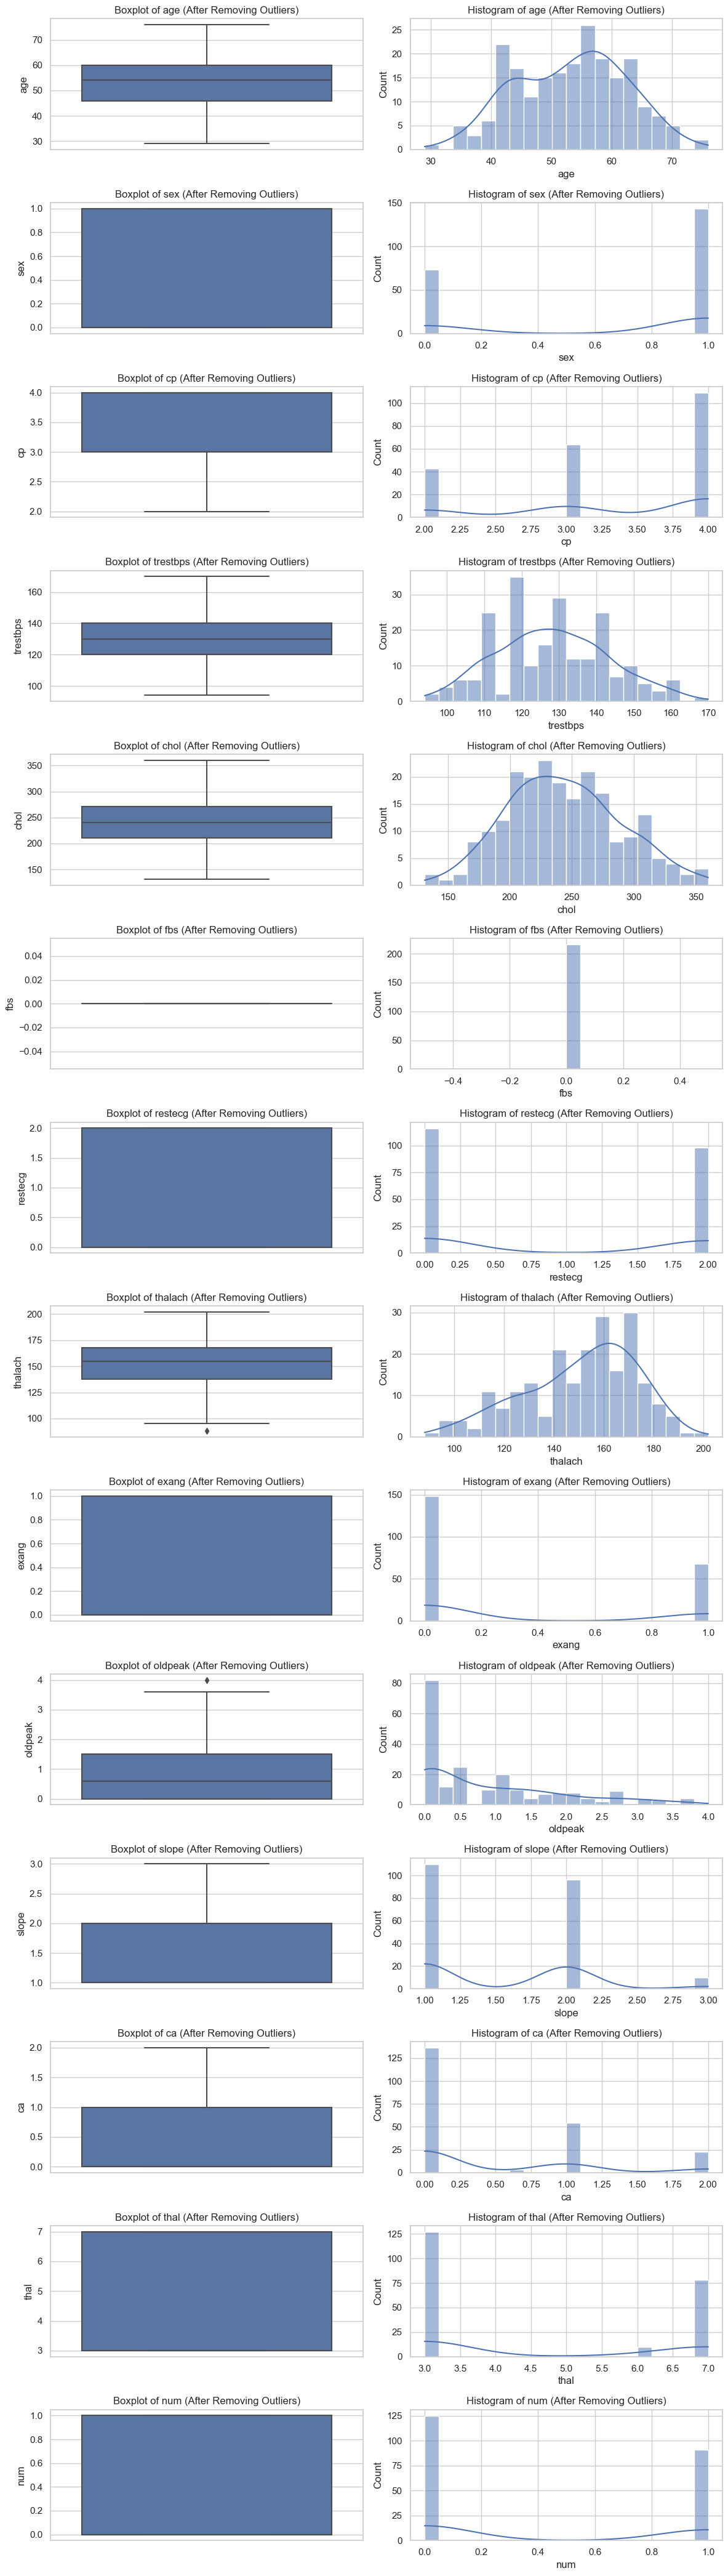

In [17]:
plot_distributions(df_cleaned, "(After Removing Outliers)")

In [9]:
df_copy =df.copy()

In [15]:
df = df_copy.copy()

 Balancing Classes

In [16]:
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = df.drop('num', axis=1)  # Assuming 'num' is the target column
y = df['num']

# Initialize SMOTE
smote = SMOTE(random_state=42)
# Fit and resample the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame from the resampled data
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['num'] = y_resampled

# Check the new class distribution
print(df_balanced['num'].value_counts())


num
0    164
1    164
Name: count, dtype: int64


In [18]:
# Feature Engineering: create interaction features between age, cholesterol, and chest pain type (cp)
df_balanced['age_chol_interaction'] = df_balanced['age'] * df_balanced['chol']
df_balanced['cp_trestbps_interaction'] = df_balanced['cp'] * df_balanced['trestbps']

In [25]:
# One-Hot Encode categorical features
df = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca'], drop_first=True)

In [14]:
from sklearn.preprocessing import StandardScaler

# Select numerical features for scaling
numerical_features = df.select_dtypes(include=['float64', 'int']).columns.tolist()
numerical_features.remove('num') 

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [67]:
df.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'num',
       'age_chol_interaction', 'cp_trestbps_interaction',
       'sex_0.6813851438692468', 'cp_-1.2393457539438486',
       'cp_-0.18622293712109636', 'cp_0.8668998797016558',
       'fbs_2.4152294576982403', 'restecg_-0.0061928112222263305',
       'restecg_1.0094282292228909', 'exang_1.4272480642961254',
       'slope_0.6809540038762575', 'slope_2.3232548367542907',
       'ca_-0.7442304503413866', 'ca_-0.724191871029774',
       'ca_-0.508602444861108', 'ca_-0.3478571290098853',
       'ca_-0.28968361580500074', 'ca_-0.24834143345762782',
       'ca_-0.1379250764193913', 'ca_-0.0368561876338034',
       'ca_-0.02819699103075281', 'ca_0.31497525435003265',
       'ca_0.47045513190892885', 'ca_0.8349185974588428',
       'ca_0.9746967813002807', 'ca_0.9949735812328291',
       'ca_1.1405683622749232', 'ca_1.2302094407339808',
       'ca_1.2882341268049213', 'ca_1.29115914813853', 'ca_1.3263769329250206',
       'ca_1.35241

In [26]:
df

,age,trestbps,chol,thalach,oldpeak,num,sex_1,cp_2,cp_3,cp_4,...,exang_1,slope_2,slope_3,thal_4.73421926910299,thal_6.0,thal_7.0,ca_0.6722408026755853,ca_1.0,ca_2.0,ca_3.0
0,63,145,233,150,2.3,0,True,False,False,False,...,False,False,True,False,True,False,False,False,False,False
1,67,160,286,108,1.5,1,True,False,False,True,...,True,True,False,False,False,False,False,False,False,True
2,67,120,229,129,2.6,1,True,False,False,True,...,True,True,False,False,False,True,False,False,True,False
3,37,130,250,187,3.5,0,True,False,True,False,...,False,False,True,False,False,False,False,False,False,False
4,41,130,204,172,1.4,0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,110,264,132,1.2,1,True,False,False,False,...,False,True,False,False,False,True,False,False,False,False
299,68,144,193,141,3.4,1,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False
300,57,130,131,115,1.2,1,True,False,False,True,...,True,True,False,False,False,True,False,True,False,False
301,57,130,236,174,0.0,1,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False


# XGBOOST

In [28]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Select features and target variable
features = [
    'age', 'trestbps', 'chol', 'thalach', 'oldpeak',
    'age_chol_interaction', 'cp_trestbps_interaction',
    'sex_0.6862024383574916', 'cp_-1.2085212071259324',
    'cp_-0.165267857384743', 'cp_0.8779854923564463',
    'fbs_2.394437999475729', 'restecg_0.009967492533478743',
    'restecg_1.016684238414831', 'exang_1.4354811251305466',
    'slope_0.649113234537161', 'slope_2.2745786069731917',
    'ca_0.0', 'ca_0.35255377418379186', 'ca_1.428202534193524',
    'ca_2.5038512942032565', 'thal_0.0', 'thal_0.6558179652783838',
    'thal_1.1739313709182617'
]

target = 'num'  # Replace with the name of your target variable

# Splitting the data into training and testing sets
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



KeyError: "['age_chol_interaction', 'cp_trestbps_interaction', 'sex_0.6862024383574916', 'cp_-1.2085212071259324', 'cp_-0.165267857384743', 'cp_0.8779854923564463', 'fbs_2.394437999475729', 'restecg_0.009967492533478743', 'restecg_1.016684238414831', 'exang_1.4354811251305466', 'slope_0.649113234537161', 'slope_2.2745786069731917', 'ca_0.0', 'ca_0.35255377418379186', 'ca_1.428202534193524', 'ca_2.5038512942032565', 'thal_0.0', 'thal_0.6558179652783838', 'thal_1.1739313709182617'] not in index"

In [60]:
# Create the XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [61]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.79
Confusion Matrix:
 [[24  5]
 [ 8 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.83      0.79        29
           1       0.83      0.75      0.79        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61

